In [1]:
import pandas as pd
import numpy as np

# Daily merging

Better do it weekly to align dates

In [2]:
#covid
df_covid = pd.read_csv('silver/covid_data.csv')
df_covid.head()

,state,country,lat,long,date,cases,new_cases
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0


In [3]:
df_covid.country.unique()

array(['Brazil', 'Chile', 'Colombia', 'Dominican Republic', 'Germany',
       'Italy', 'Mexico', 'Panama', 'US', 'Uruguay'], dtype=object)

In [4]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date_str'] = df_covid['date'].astype(str)

In [5]:
df_atmos = pd.read_csv('silver/atmosferic_data.csv')
df_atmos.head()

,Date,Country,Specie,median
0,2022-03-28,BR,co,2.266667
1,2022-03-28,BR,dew,20.000000
2,2022-03-28,BR,humidity,81.000000
3,2022-03-28,BR,no2,6.066667
4,2022-03-28,BR,o3,15.866667


In [6]:
df_atmos['date'] = pd.to_datetime(df_atmos['Date'])
df_atmos['date_str'] = df_atmos['date'].astype(str)

In [7]:
dict_countries_2 = {'BR':'Brazil','CL':'Chile', 'CO':'Colombia', 'IT':'Italy',
                  'MX':'Mexico', 'PA':'Panama', 'US':'US', 'DE': 'Germany'}

In [8]:
# new countries atmospheric
new_countries = []
for i in range(len(df_atmos)):
    new_country = dict_countries_2[df_atmos['Country'][i]]
    new_countries.append(new_country)

df_atmos['country'] = new_countries

In [9]:
df_atmos

,Date,Country,Specie,median,date,date_str,country
0,2022-03-28,BR,co,2.266667,2022-03-28,2022-03-28,Brazil
1,2022-03-28,BR,dew,20.000000,2022-03-28,2022-03-28,Brazil
2,2022-03-28,BR,humidity,81.000000,2022-03-28,2022-03-28,Brazil
3,2022-03-28,BR,no2,6.066667,2022-03-28,2022-03-28,Brazil
4,2022-03-28,BR,o3,15.866667,2022-03-28,2022-03-28,Brazil
...,...,...,...,...,...,...,...
191548,2023-12-31,MX,pressure,1015.327273,2023-12-31,2023-12-31,Mexico
191549,2023-12-31,MX,so2,4.714286,2023-12-31,2023-12-31,Mexico
191550,2023-12-31,MX,temperature,13.700000,2023-12-31,2023-12-31,Mexico
191551,2023-12-31,MX,wind-gust,6.380000,2023-12-31,2023-12-31,Mexico


In [10]:
df_atmos_wide = pd.pivot_table(df_atmos, index=['date_str', 'country'], columns = ['Specie'], values = 'median').reset_index()
df_atmos_wide.head()

Specie,date_str,country,co,d,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,uvi,wd,wind gust,wind speed,wind-gust,wind-speed
0,2014-12-29,Brazil,5.50,NaN,NaN,NaN,12.400000,19.700000,20.500000,50.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-29,Chile,7.22,NaN,NaN,NaN,6.200000,15.600000,25.400000,34.636364,NaN,NaN,2.825000,NaN,4.3,NaN,NaN,NaN,NaN,NaN
2,2014-12-29,Colombia,5.10,NaN,NaN,NaN,6.500000,4.200000,29.000000,50.000000,NaN,NaN,0.800000,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
3,2014-12-29,Germany,1.15,NaN,NaN,NaN,14.553333,9.453846,17.933333,44.500000,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-29,Italy,0.10,NaN,NaN,NaN,32.583333,12.433333,18.571429,72.250000,NaN,NaN,2.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# see nans by column for df_atmos_wide
df_atmos_wide.isnull().sum()

Specie
date_str             0
country              0
co                  37
d                16847
dew               5381
humidity          4867
no2                 48
o3                  39
pm10                18
pm25               139
precipitation    13670
pressure          4874
so2                 54
temperature       4865
uvi              16197
wd               13249
wind gust        16288
wind speed       16274
wind-gust         6227
wind-speed        5526
dtype: int64

In [12]:
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date_str'])

In [13]:
# filter for 2020 onwards
df_atmos_wide_2020 = df_atmos_wide[df_atmos_wide['date_str'] >= '2020-01-01']

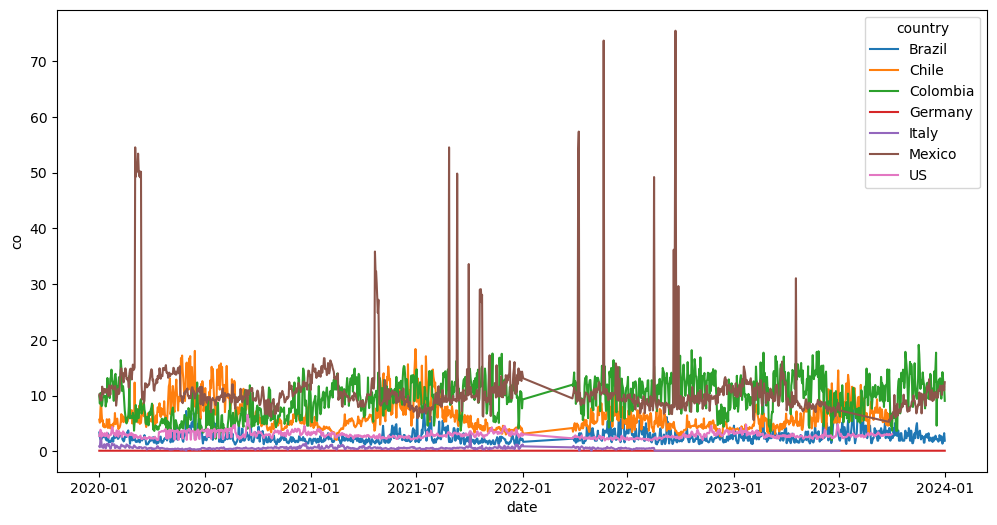

In [14]:
# plot co, no2, o3, pm10, pm25, so2
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='co', hue='country')
plt.show()

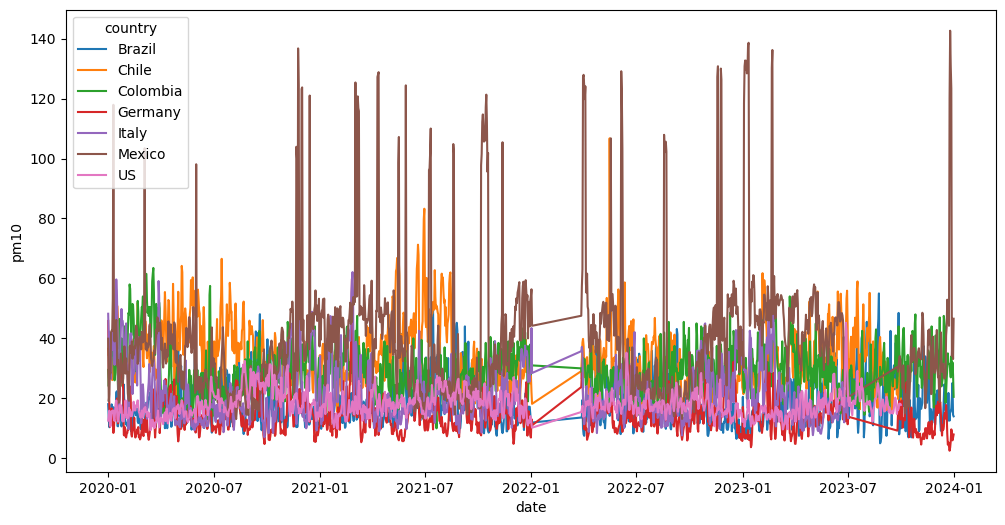

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='pm10', hue='country')
plt.show()

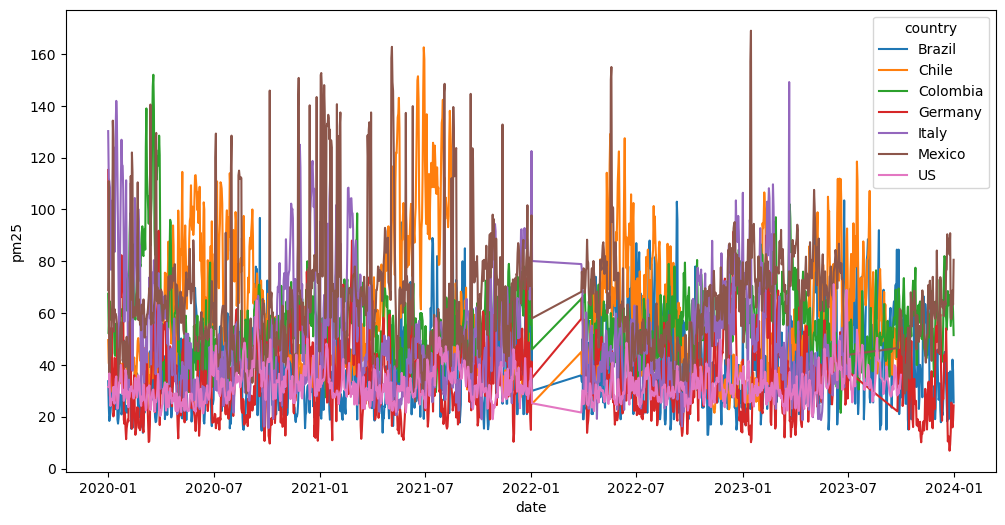

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='pm25', hue='country')
plt.show()

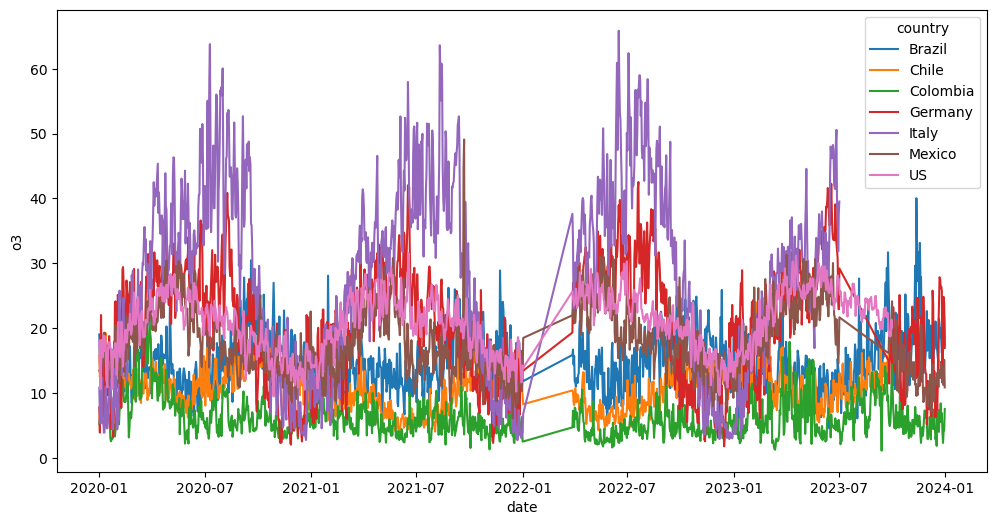

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='o3', hue='country')
plt.show()

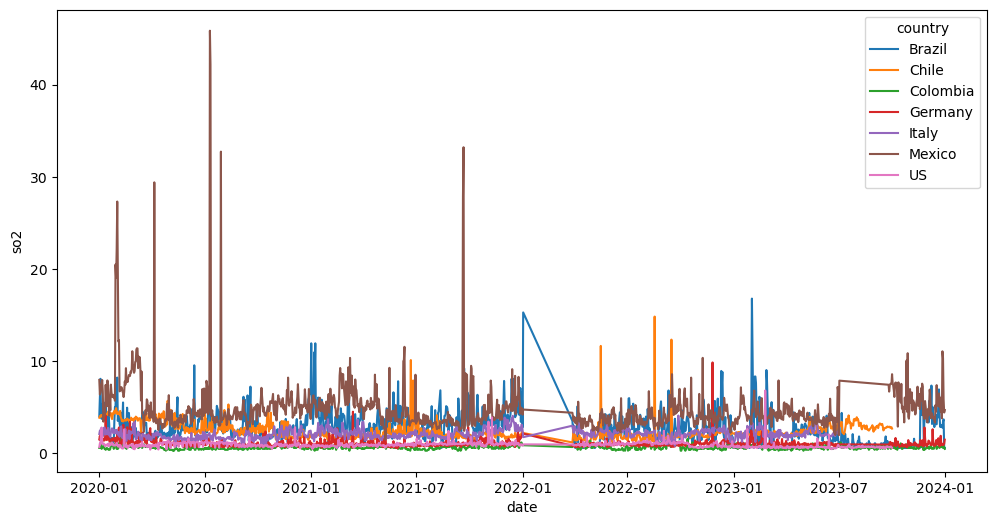

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_atmos_wide_2020, x='date', y='so2', hue='country')
plt.show()

In [19]:
# interpolate co, no2, o3, pm10, pm25, so2 by country

df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date'])

# Sort by country and date
df_atmos_wide = df_atmos_wide.sort_values(by=['country', 'date'])

# List of pollutant columns
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].apply(lambda x: x.interpolate(method='linear'))

# Optionally, fill any remaining NaNs using forward/backward fill
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if NaNs remain
print(df_atmos_wide.isna().sum())


TypeError: incompatible index of inserted column with frame index

In [20]:


# Ensure 'date' is in datetime format
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date'])

# Sort by country and date
df_atmos_wide = df_atmos_wide.sort_values(by=['country', 'date'])

# List of pollutant columns
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

# Interpolate NaNs within each country
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.interpolate(method='linear'))

# Fill remaining NaNs using forward/backward fill within each country
df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Check if NaNs remain
print(df_atmos_wide.isna().sum())


Specie
date_str             0
country              0
co                   0
d                16847
dew               5381
humidity          4867
no2                  0
o3                   0
pm10                 0
pm25                 0
precipitation    13670
pressure          4874
so2                  0
temperature       4865
uvi              16197
wd               13249
wind gust        16288
wind speed       16274
wind-gust         6227
wind-speed        5526
date                 0
dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_41588\3578592592.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\danie\AppData\Local\Temp\ipykernel_41588\3578592592.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_atmos_wide[pollutants] = df_atmos_wide.groupby('country')[pollutants].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


<Axes: xlabel='date', ylabel='pm10'>

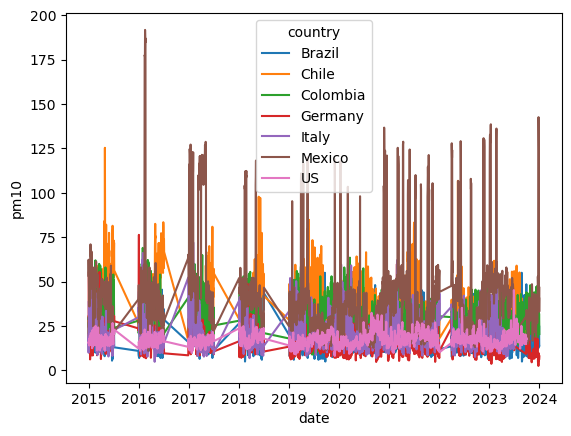

In [21]:
sns.lineplot(data=df_atmos_wide, x='date', y='pm10', hue='country')

In [22]:
df_atmos_wide.isnull().sum()

Specie
date_str             0
country              0
co                   0
d                16847
dew               5381
humidity          4867
no2                  0
o3                   0
pm10                 0
pm25                 0
precipitation    13670
pressure          4874
so2                  0
temperature       4865
uvi              16197
wd               13249
wind gust        16288
wind speed       16274
wind-gust         6227
wind-speed        5526
date                 0
dtype: int64

In [23]:
df_population = pd.read_csv('silver/un_population.csv')
df_population.head()

,country,year,population
0,World,2020,7851414621
1,World,2021,7922587963
2,World,2022,7986308820
3,World,2023,8056505564
4,Sub-Saharan Africa,2020,1110090241


In [24]:
df_population['country'] = df_population['country'].str.replace('United States of America', 'US')

# Merge

In [25]:
df_atmos_wide.drop(columns=['date'], inplace=True)

In [26]:
df_merge0 = df_covid.merge(df_atmos_wide, how ='left', on=['date_str', 'country'])
df_merge0.head()

,state,country,lat,long,date,cases,new_cases,date_str,co,d,...,precipitation,pressure,so2,temperature,uvi,wd,wind gust,wind speed,wind-gust,wind-speed
0,NaN,Brazil,-14.235,-51.9253,2020-01-22,0,0,2020-01-22,2.033333,NaN,...,NaN,1011.866667,1.433333,22.333333,NaN,NaN,6.400000,3.033333,NaN,NaN
1,NaN,Brazil,-14.235,-51.9253,2020-01-23,0,0,2020-01-23,2.366667,NaN,...,NaN,1008.733333,1.666667,21.433333,NaN,NaN,7.166667,4.066667,NaN,NaN
2,NaN,Brazil,-14.235,-51.9253,2020-01-24,0,0,2020-01-24,2.300000,NaN,...,NaN,1005.900000,1.200000,21.233333,NaN,NaN,10.400000,4.733333,NaN,NaN
3,NaN,Brazil,-14.235,-51.9253,2020-01-25,0,0,2020-01-25,1.733333,NaN,...,NaN,1009.433333,1.066667,22.600000,NaN,NaN,4.833333,3.333333,NaN,NaN
4,NaN,Brazil,-14.235,-51.9253,2020-01-26,0,0,2020-01-26,2.600000,NaN,...,NaN,1014.266667,1.500000,23.100000,NaN,NaN,3.666667,1.033333,NaN,NaN


In [27]:
df_merge0['year'] = df_merge0['date'].dt.year

In [28]:
df_merge2 = df_merge0.merge(df_population, how ='left', on=['country', 'year'])

In [29]:
df_merge_final = df_merge2.copy()

In [30]:
# this for changing the column names when they are too long
'''from transformers import pipeline

# Load a pre-trained model for text summarization
summarizer = pipeline("summarization", model="t5-small")

# Function to simplify column names
def simplify_column_name(column_name):
    # Summarize the column name to get a simpler version
    summary = summarizer(column_name, max_length=5, min_length=1, do_sample=False)
    return summary[0]['summary_text']'''

'from transformers import pipeline\n\n# Load a pre-trained model for text summarization\nsummarizer = pipeline("summarization", model="t5-small")\n\n# Function to simplify column names\ndef simplify_column_name(column_name):\n    # Summarize the column name to get a simpler version\n    summary = summarizer(column_name, max_length=5, min_length=1, do_sample=False)\n    return summary[0][\'summary_text\']'

In [31]:
# Simplify all column names
#df_merge_final.columns = [simplify_column_name(col) for col in df_merge_final.columns]

#df_merge_final.columns

In [32]:
# remove columns that are only nulls
df_merge_final = df_merge_final.dropna(axis=1, how='all')
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        11430 non-null  object        
 1   lat            11430 non-null  float64       
 2   long           11430 non-null  float64       
 3   date           11430 non-null  datetime64[ns]
 4   cases          11430 non-null  int64         
 5   new_cases      11430 non-null  int64         
 6   date_str       11430 non-null  object        
 7   co             7413 non-null   float64       
 8   dew            7296 non-null   float64       
 9   humidity       7360 non-null   float64       
 10  no2            7413 non-null   float64       
 11  o3             7413 non-null   float64       
 12  pm10           7413 non-null   float64       
 13  pm25           7413 non-null   float64       
 14  precipitation  2189 non-null   float64       
 15  pressure       7360

In [33]:
nan_counts_sorted = df_merge_final.isna().sum().sort_values(ascending=False)
print(nan_counts_sorted)

wind gust        11006
wind speed       10994
wd                9401
precipitation     9241
wind-gust         4677
wind-speed        4495
dew               4134
humidity          4070
pressure          4070
temperature       4070
so2               4017
o3                4017
pm10              4017
no2               4017
pm25              4017
co                4017
country              0
new_cases            0
date_str             0
date                 0
cases                0
long                 0
lat                  0
year                 0
population           0
dtype: int64


In [34]:
df_merge_final[df_merge_final['pm25'].isnull()]

,country,lat,long,date,cases,new_cases,date_str,co,dew,humidity,...,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed,year,population
712,Brazil,-14.2350,-51.9253,2022-01-03,22309081,11654,2022-01-03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,209905829
713,Brazil,-14.2350,-51.9253,2022-01-04,22328252,19171,2022-01-04,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,209905829
714,Brazil,-14.2350,-51.9253,2022-01-05,22351104,22852,2022-01-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,209905829
715,Brazil,-14.2350,-51.9253,2022-01-06,22386930,35826,2022-01-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,209905829
716,Brazil,-14.2350,-51.9253,2022-01-07,22450222,63292,2022-01-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,209905829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,Uruguay,-32.5228,-55.7658,2023-03-05,1034303,0,2023-03-05,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,3388682
11426,Uruguay,-32.5228,-55.7658,2023-03-06,1034303,0,2023-03-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,3388682
11427,Uruguay,-32.5228,-55.7658,2023-03-07,1034303,0,2023-03-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,3388682
11428,Uruguay,-32.5228,-55.7658,2023-03-08,1034303,0,2023-03-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,3388682


In [ ]:
# see the countries for column named 'co' has missing values
df_merge_final[df_merge_final['co'].isna()]['country'].unique()

In [ ]:
df_atmos_wide['date'] = pd.to_datetime(df_atmos_wide['date_str'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# lineplot using seaborn for column 'co', x axis is data and y axis is 'co', hue by country
sns.lineplot(data=df_atmos_wide, x='date', y='pm10', hue='country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
threshold = len(df_merge_final) * 0.95
df_merge_final_small = df_merge_final.dropna(thresh=threshold, axis=1)
df_merge_final_small.info()

In [ ]:
# remove repeated columns for df_merge_final_small
df_merge_final_small = df_merge_final_small.loc[:,~df_merge_final_small.columns.duplicated()]
df_merge_final_small.info()

In [ ]:
for col in df_merge_final_small.columns:
    print(col)

In [ ]:
df_merge_final_small.drop(columns=['latvian','long-term', 'latitude', 'longitu',
                                    'date_st', 'year','coal rents'], inplace=True)

In [ ]:
df_merge_final_small.info()

In [ ]:
df_merge_final_small.rename(columns={'date:':'date', }, inplace=True)

In [ ]:
# remove nans
df_merge_final_small.dropna(inplace=True)

In [ ]:
df_merge_final_small.info()

In [ ]:
import os

# Specify the directory path
directory_path = 'gold'

# Create the directory if it does not exist
os.makedirs(directory_path, exist_ok=True)

df_merge_final_small.to_csv('gold/covid_daily_multivariate.csv', index = False)